In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import universality
from universality import stats
import bilby
import seaborn as sns
import temperance as tmpy
from temperance.core import result
from temperance.core.result import EoSPosterior


from temperance.plotting import corner




In [2]:
samples_paths = {"170817":"/home/isaac.legred/New_NICER/NoNSAnalysis/CalcSamples/LVC_GW170817_PhenomPNRT-lo_eos.csv", 
                "190425":"/home/isaac.legred/New_NICER/NoNSAnalysis/CalcSamples/LVC_GW190425_PhenomPNRT-lo_eos.csv",
                "Fonseca":"/home/isaac.legred/New_NICER/NoNSAnalysis/CalcSamples/Fonseca_J0740_eos.csv",
                "Antoniadis":"/home/isaac.legred/New_NICER/NoNSAnalysis/CalcSamples/Antoniadis_J0348_eos.csv",
                "J0030": "/home/isaac.legred/New_NICER/NSTOVMaxAnalysis/NewCalcSamples/Miller_J0030_three-spot_eos.csv",
                "J0740": "/home/isaac.legred/New_NICER/NSTOVMaxAnalysis/NewCalcSamples/Miller_J0740_eos.csv"}

additional_properties = pd.read_csv("/home/isaac.legred/PTAnalysis/Analysis/corrected_np_all_post.csv")



# Corner Plots -- Plotting an EoS Posterior

In [12]:
plottable_columns = {}
plottable_columns["Mmax"] = corner.PlottableColumn(name="Mmax",
                                     label=corner.get_default_label("Mmax"),
                                     plot_range=(1.8, 3.1),
                                     bandwidth=.05)
plottable_columns["R1p4"] = corner.PlottableColumn(name="R(M=1.4)",
                                     label=corner.get_default_label("R(M=1.4)"),
                                     plot_range=(8.0, 17.0),
                                     bandwidth=.2)
plottable_columns["Lambda1p4"] = corner.PlottableColumn(name="Lambda(M=1.4)",
                                     label="$\Lambda_{1.4}$",
                                     plot_range=(0.0, 2e3),
                                     bandwidth=15)


In [5]:
J0740_eos_likelihood = EoSPosterior.from_csv(samples_paths["J0740"])

In [13]:
J0740_eos_likelihood.weight_columns_available[0].is_log = True
log_marg_weight= result.WeightColumn(name='logmargweight', is_log=True, is_inverted=False)

In [14]:
plottable_samples = {"J0740" : corner.PlottableEoSSamples(label="J0740", posterior=J0740_eos_likelihood, 
                                                       weight_columns_to_use=[log_marg_weight], 
                                                       additional_properties=additional_properties, color="b")}

In [15]:
plottable_samples

{'J0740': PlottableEoSSamples(label='J0740', posterior=<temperance.core.result.EoSPosterior object at 0x7f4fc7099790>, weight_columns_to_use=[WeightColumn(name='logmargweight', is_log=True, is_inverted=False)], additional_properties=              eos  logweight_total      Mmax  \
 0       2265967.0             -inf  1.700984   
 1        264698.0             -inf  1.590114   
 2       1683176.0             -inf  0.402205   
 3        696150.0             -inf  0.860414   
 4        275937.0             -inf  1.236473   
 ...           ...              ...       ...   
 319993   280847.0             -inf  0.906045   
 319994   459317.0             -inf  0.590972   
 319995  2234499.0             -inf  1.665527   
 319996  2285403.0             -inf  1.415895   
 319997  1340918.0             -inf  0.559531   
 
         pressurec2(baryon_density=2.8e+14)  \
 0                             3.139719e+12   
 1                             3.624216e+11   
 2                             5.6128

In [16]:
# e.g. (This still doesn't work "perfectly")
#corner.get_property_columns(plottable_samples["J0740"])

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Palatino
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Palatino


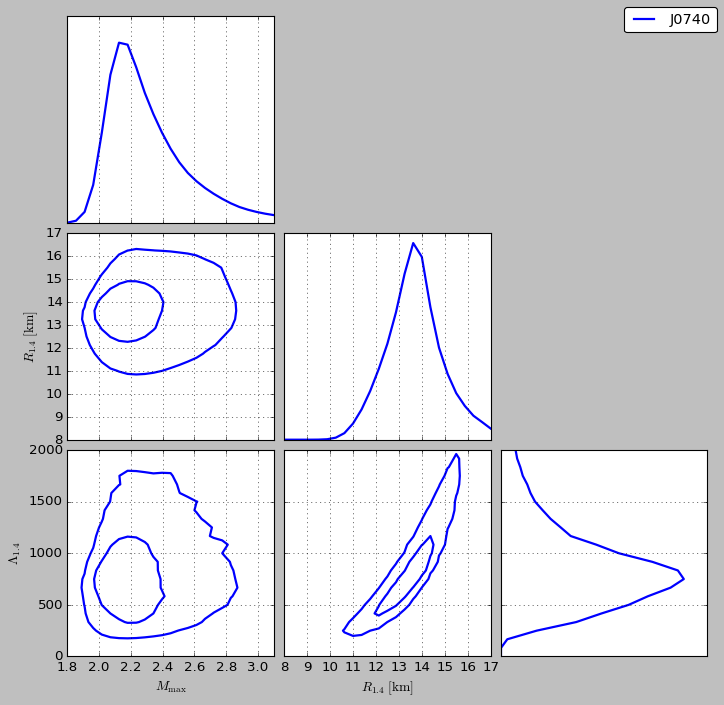

In [17]:
mpl.rc('font', **{'family':'serif','serif':['Palatino']})
fig = corner.corner_eos(list(plottable_samples.values()), use_universality=True,
                 columns_to_plot=list(plottable_columns.values()), levels=np.array([ .9, .5]), figwidth=9, figheight=9)

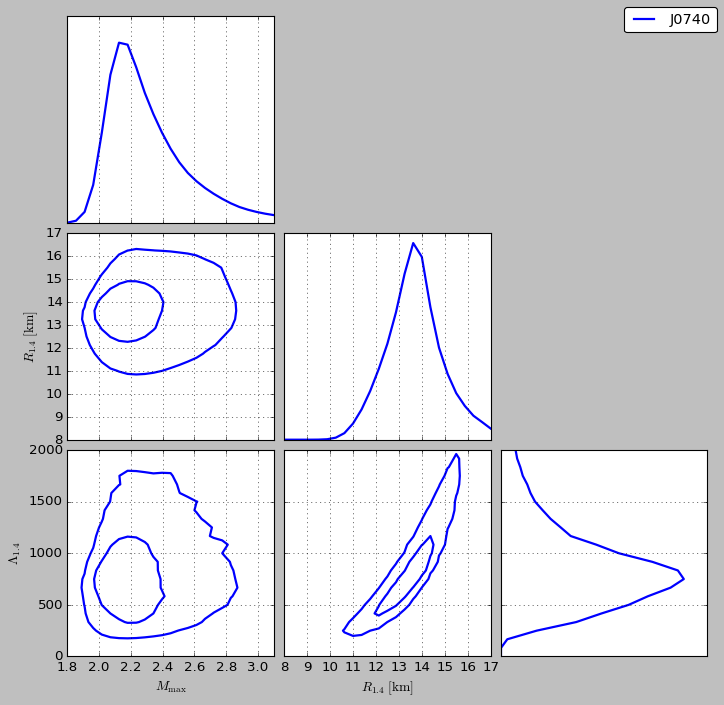

In [10]:
fig # The posterior associated with the EoS Posterior of J0740+6620

In [10]:
fig.savefig("example_plot.pdf")


# Marginalizing over a mass prior to get an EoS Posterior

In [3]:
# The paths to the entire set of likelihood evaluations for each observation
samples_paths = {"170817":"/home/isaac.legred/New_NICER/NoNSAnalysis/CalcSamples/LVC_GW170817_PhenomPNRT-lo_post.csv", 
                "190425":"/home/isaac.legred/New_NICER/NoNSAnalysis/CalcSamples/LVC_GW190425_PhenomPNRT-lo_post.csv",
                "Fonseca":"/home/isaac.legred/New_NICER/NoNSAnalysis/CalcSamples/Fonseca_J0740_post.csv",
                "Antoniadis":"/home/isaac.legred/New_NICER/NoNSAnalysis/CalcSamples/Antoniadis_J0348_post.csv",
                "J0030": "/home/isaac.legred/New_NICER/NSTOVMaxAnalysis/NewCalcSamples/Miller_J0030_three-spot_post.csv",
                "J0740": "/home/isaac.legred/New_NICER/NSTOVMaxAnalysis/NewCalcSamples/Miller_J0740_post.csv"}

sample_path = samples_paths["170817"]
num_eos = 10000
# This is hacky (should probably be patched up internally)
samples_170817 = pd.read_csv(sample_path, nrows=(50*num_eos))
samples_170817.keys()


Index(['eos', 'm1', 'm2', 'Lambda1', 'Lambda2', 'numbranches', 'Mmin', 'Mmax',
       'logweight'],
      dtype='object')

In [4]:
# The result of the inference, as represented by the weighted samples
result_170817 = result.InferenceResult(samples_170817, default_marginalization_prior=None)

In [5]:
#Use the default marginalization (we take the prior to be flat on m_1, m_2 between 0 and 4 (for consistency with the other check)
logweight_column = result_170817.weight_columns_available[0]
original_marg_170817 = result_170817.get_marginalization(weight_column=logweight_column, 
                                                         prior =result.Prior(name="default", 
                                                         pdf=lambda sample: 0.125))

/home/isaac.legred/temperance/temperance/core/result.py:63: RuntimeWarning: divide by zero encountered in log
  lmw = np.log((prior_weights*np.exp(np.array(data[column_to_compute]))).sum())
/home/isaac.legred/temperance/temperance/core/result.py:65: RuntimeWarning: divide by zero encountered in log
  lmw2 = np.log(
/home/isaac.legred/temperance/temperance/core/result.py:174: RuntimeWarning: invalid value encountered in subtract
  logvar = squares + np.log(1. - np.exp(2*posteriors -
/home/isaac.legred/temperance/temperance/core/result.py:174: RuntimeWarning: invalid value encountered in log
  logvar = squares + np.log(1. - np.exp(2*posteriors -


In [6]:
# An example using an alternative prior weighting of samples (from an external source)
#from scipy.stats import multivariate_normal
class ExternalGaussianMassPrior:
    def __init__(self, mass_1_peak, mass_2_peak, inv_covar=np.eye(2), mass_names=("m1", "m2")):
        self.mass_1_peak=mass_1_peak 
        self.mass_2_peak=mass_2_peak
        self.inv_covar=inv_covar
        self.covar=np.linalg.inv(inv_covar)
        self.mass_names=mass_names
        # Infer the normalization estimate (need to do this because of cuts (there is probably a better way))    
        self.normalization_estimate = 1.0
        self.normalization_estimate = self.get_normalization_estimate()
        #self.pdf_eval= multivariate_normal(mean=np.array([self.mass_1_peak, self.mass_2_peak]), 
        #                                                 cov=self.covar).pdf
        
    def get_normalization_estimate(self, num_samples=1000, prior_volume=8):
        return (np.sum(1/self.pdf(self.sample(N=1000))))/prior_volume/num_samples
    def pdf(self, sample):
        # The scipy version doesn't seem to be vectorized
        #return self.pdf_eval(np.array([sample[self.mass_names[0]], sample[self.mass_names[1]]]))
        z_0 = np.stack([np.array(sample["m1"] - self.mass_1_peak), 
                        np.array(sample["m2"] - self.mass_2_peak)])
        return self.normalization_estimate * np.sum(z_0 * (self.inv_covar @ z_0), axis=0)
    def sample(self, N=1, seed=None):
        rng = np.random.default_rng(seed=seed)
        sample_data = rng.multivariate_normal(
            mean=np.array([self.mass_1_peak, self.mass_2_peak]), 
            cov=self.covar, size=(N, 2))
        sample_data.sort(axis=1)
        allowed = np.logical_and(4.0>sample_data[:,1],  sample_data[:,0]> 0.0)
        print(allowed)
        sample_data = sample_data[allowed, :]
        return pd.DataFrame({self.mass_names[0] : sample_data[:,1], 
                             self.mass_names[1] : sample_data[:,0]})
    
    
    

gaussian_prior = ExternalGaussianMassPrior(mass_1_peak=1.4, mass_2_peak=1.4)
gaussian_prior.normalization_estimate
new_marg_170817 = result_170817.get_marginalization(weight_column=logweight_column, prior=result.Prior(name="peaked", 
                                                pdf= gaussian_prior.pdf, sample=gaussian_prior.sample))

[[ True  True]
 [False  True]
 [ True False]
 ...
 [False  True]
 [ True  True]
 [ True False]]


In [7]:
# Get the "EoS posteriors", 
eos_posterior_170817 = EoSPosterior.from_marginalized_likelihood(original_marg_170817[0], 
                                                                 label="default_170817")
new_eos_posterior_170817 = EoSPosterior.from_marginalized_likelihood(new_marg_170817[0], 
                                                                     label="new_170817")

In [11]:
log_marg_weight = eos_posterior_170817.weight_columns_available[0]
new_plottable_samples = {"GW170817_new" : corner.PlottableEoSSamples(label="GW170817_new", 
                                                              posterior=new_eos_posterior_170817, 
                                                           weight_columns_to_use=[log_marg_weight], 
                                                           additional_properties=additional_properties, 
                                                              color="g"),
                        "GW170817" : corner.PlottableEoSSamples(label="GW170817", 
                                                              posterior=eos_posterior_170817, 
                                                           weight_columns_to_use=[log_marg_weight], 
                                                           additional_properties=additional_properties, 
                                                              color="b")}

NameError: name 'additional_properties' is not defined

In [19]:
new_fig = corner.corner_eos(list(new_plottable_samples.values()), use_universality=True,
                 columns_to_plot=list(plottable_columns.values()), levels=np.array([ .9, .5]), figwidth=9, figheight=9)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman


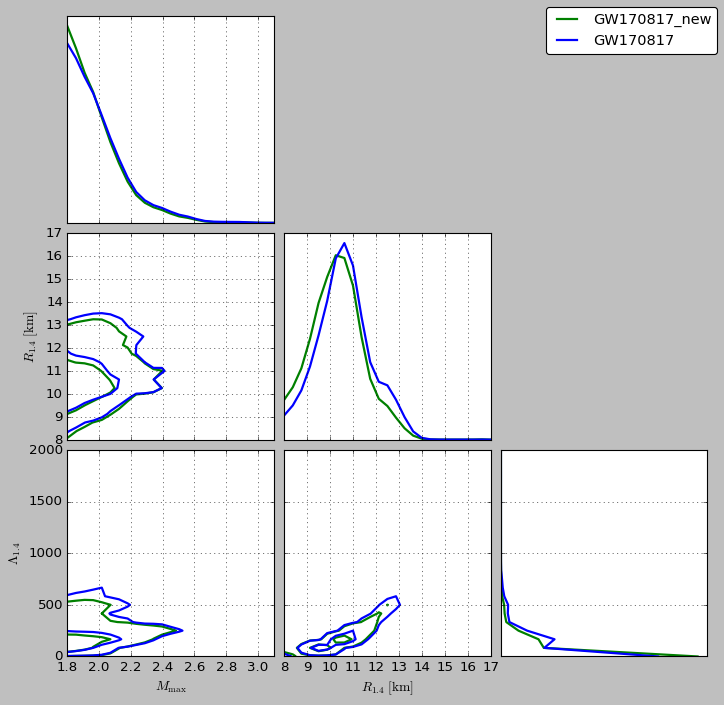

In [20]:
new_fig

In [ ]:
# Merge posteriors to get multiple likelihoods in the same posterior object
new_eos_posterior_170817.merge(J0740_eos_likelihood).samples

# Analyze Population Likelihood
Compute $P(d | \lambda)$  marginalized over the equation of state parameters

In [8]:
print("evidence for original population", eos_posterior_170817.estimate_evidence([log_marg_weight])[0])
print("evidence for new population", new_eos_posterior_170817.estimate_evidence([log_marg_weight])[0])


NameError: name 'log_marg_weight' is not defined

In [10]:
log_marg_column = J0740_eos_likelihood.weight_columns_available[0]
J0740_eos_likelihood.estimate_evidence([log_marg_column])

(196122.33362719696, -38463245127.56356)

In [47]:
z_0 = gaussian_prior(result_170817.samples, 1.4, 1.4)

In [1]:
%matplotlib inline
reduced_samples =result_170817.sample(size=1000, column=["m1", "m2"], weight_columns=[logweight_column])
plt.scatter(result_170817.sample(size=1000, column="")["m1"],result_170817.sample(size=1000)["m2"] )
plt.show()

The history saving thread hit an unexpected error (OperationalError('disk I/O error')).History will not be written to the database.
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/isaac.legred/.conda/envs/tmpy39/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3398, in run_code
  File "/tmp/ipykernel_2535776/4178630297.py", line 1, in <cell line: 1>
    get_ipython().run_line_magic('matplotlib', 'inline')
  File "/home/isaac.legred/.conda/envs/tmpy39/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2305, in run_line_magic
  File "/home/isaac.legred/.conda/envs/tmpy39/lib/python3.9/site-packages/IPython/core/magics/pylab.py", line 99, in matplotlib
  File "/home/isaac.legred/.conda/envs/tmpy39/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3478, in enable_matplotlib
  File "<frozen importlib._bootstrap>", line 1007, in _find_and_load
  File "<frozen importlib._bootstrap>", line 982, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 925, in _find_spec
  File "<frozen importlib._bootstrap_external>", line 1423, in find_spec
  File "<froz

In [55]:
np.sum(z_0 * (np.eye(2) @ z_0),axis=0)

array([0.00234891, 0.05881178, 0.09199846, ..., 0.10220453, 0.07212119,
       0.16768174])

In [52]:
z_0

array([[-0.0313054,  0.1438722,  0.1970949, ...,  0.2119936,  0.1739815,
         0.2899555],
       [-0.0369984, -0.1952244, -0.2305473, ..., -0.2392974, -0.2045767,
        -0.2891497]])

0         1.368695
100       1.375556
200       1.541766
300       1.721381
400       1.580188
            ...   
499500    1.464299
499600    1.507901
499700    1.687563
499800    1.551834
499900    1.455002
Name: m1, Length: 5000, dtype: float64